In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader, Dataset, SubsetRandomSampler
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import random

In [2]:
# Define the transformation to be applied to the images
transform = transforms.Compose([transforms.ToTensor()])

# Download the MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(mnist_train)

100%|██████████| 9912422/9912422 [00:00<00:00, 100067901.18it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 69062539.24it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30531175.74it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6088376.08it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [3]:
def ShowImages(dataset):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

In [82]:
def ShowImageIndex(dataset, selected_index, rotation):
    img, label = dataset[selected_index]

    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f" {label} rotated with an angle of {rotation[selected_index]} anticlockwise ")
    plt.axis("off")
    plt.show()

In [4]:


# Specify the number of images to select from each label
images_per_label = 10

# Create a list to store the selected indices
selected_indices = []

# Iterate over each label to select the specified number of images
for label in range(10):
    # Get indices of samples with the current label
    label_indices = [i for i in range(len(mnist_train)) if mnist_train.targets[i] == label]

    # Randomly select the specified number of images for the current label
    selected_indices.extend(torch.randperm(len(label_indices))[:images_per_label])

# Create a Subset with the selected indices
baseline_mnist = torch.utils.data.Subset(mnist_train, selected_indices)

print(len(baseline_mnist))

100


In [31]:
image1,label1=baseline_mnist[1]
image1

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [78]:
#functions to rotate the images by 90, 180 or 270 degrees anticloclwise

import numpy as np
def rotate_90_degrees_counterclockwise(array):
    # Transposer l'array (échanger lignes et colonnes)
    transposed_array = np.transpose(array)

    # Inverser les lignes
    rotated_array = np.flipud(transposed_array)

    return rotated_array

def rotate_180_degrees(array):
    # Transposer l'array (échanger lignes et colonnes)
    transposed_array = np.transpose(array)

    # Inverser les lignes et colonnes
    rotated_array = np.flipud(np.fliplr(transposed_array))

    return rotated_array

def rotate_270_degrees_counterclockwise(array):
    # Transposer l'array (échanger lignes et colonnes)
    transposed_array = np.transpose(array)

    # Inverser les lignes
    rotated_array = np.flipud(transposed_array)

    return rotated_array

original_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
rotated_array = rotate_90_degrees_counterclockwise(original_array)

print("Array d'origine :\n", original_array)
print("\nArray après rotation de 90 degrés dans le sens antihoraire :\n", rotated_array)

Array d'origine :
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Array après rotation de 90 degrés dans le sens antihoraire :
 [[3 6 9]
 [2 5 8]
 [1 4 7]]


In [ ]:
#test to see if it works well
new_baseline_mnist=[]
new_baseline_mnist.append(baseline_mnist[1])
image,label=baseline_mnist[1]
image=image.numpy()
#print(image)
image=rotate_90_degrees_counterclockwise(image)
#print(image)
new_baseline_mnist.append((torch.tensor([image]),label))


print(new_baseline_mnist[0])
#print(ShowImageIndex(new_baseline_mnist,0))
#print(ShowImageIndex(new_baseline_mnist,1))




In [79]:
#run to create the full baseline with rotation labels
full_baseline_mnist=[]

for i in range(len(baseline_mnist)):
  full_baseline_mnist.append(baseline_mnist[i])
  image,label=baseline_mnist[i]
  image=image.numpy()
  image=rotate_90_degrees_counterclockwise(image)
  full_baseline_mnist.append((torch.tensor([image]),label))
  image=rotate_180_degrees(image)
  full_baseline_mnist.append((torch.tensor([image]),label))
  image=rotate_270_degrees_counterclockwise(image)
  full_baseline_mnist.append((torch.tensor([image]),label))


base_list = [0, 90, 180, 270]

Y_baseline_rotations = base_list * 100

print(len(full_baseline_mnist))

400


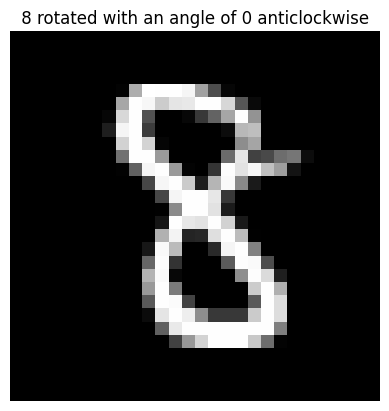

None


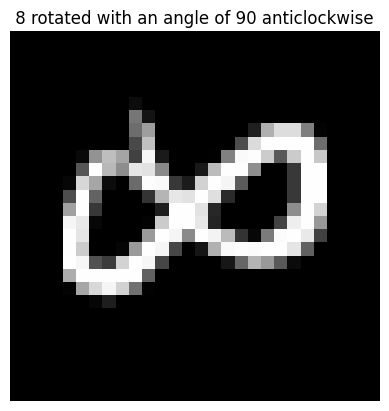

None


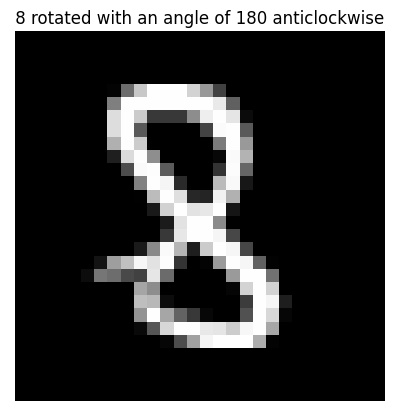

None


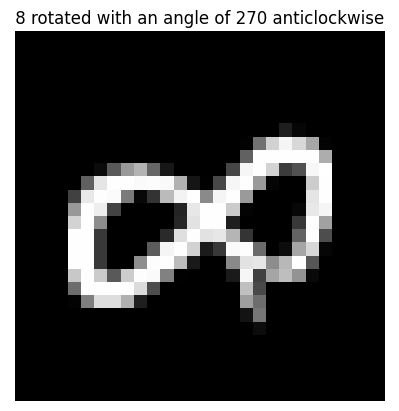

None


In [83]:
for i in range(4):
  print(ShowImageIndex(full_baseline_mnist,i,Y_baseline_rotations))

In [5]:
mnist_split_datasets = []

for label in range(10):
    # Create a list of indices corresponding to the selected labels
    selected_indices = [i for i in range(len(mnist_train)) if mnist_train.targets[i] in label]

    # Create a Subset of the MNIST dataset using the selected indices
    selected_mnist = Subset(mnist_train, selected_indices)

    # Number of images to randomly select
    num_images_to_select = 10
    # Get the total number of images in the dataset
    total_images = len(selected_mnist)
    # Create a list of indices corresponding to the entire dataset
    all_indices = list(range(total_images))
    # Shuffle the indices randomly
    random.shuffle(all_indices)
    # Select the first 10 indices (or adjust as needed)
    selected_indices = all_indices[:num_images_to_select]

    # Create a Subset of the MNIST dataset using the selected indices
    selected_mnist = Subset(selected_mnist, selected_indices)

    mnist_split_datasets.append(selected_mnist)

TypeError: ignored